In [25]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# load data
df_train = pd.read_csv('train.csv')
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [44]:
# take sample feature
sample_df_train = df_train[['LotArea','GarageArea','SalePrice']]
print(sample_df_train.head())

   LotArea  GarageArea  SalePrice
0     8450         548     208500
1     9600         460     181500
2    11250         608     223500
3     9550         642     140000
4    14260         836     250000


In [45]:
# clean data
sample_df_train = sample_df_train.dropna()

In [46]:
y_sample = sample_df_train['SalePrice']
sample_df_train = sample_df_train.drop('SalePrice',axis = 1)
# test = pd.merge(sample_df_train,y_sample,right_index = True,left_index = True)
# test

Normalization

Formula Transformation

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

nb: max and min given by feature_range


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1),copy=True)
x_scaled = scaler.fit_transform(sample_df_train)

x_sampled = pd.DataFrame(x_scaled)
sampled = pd.merge(x_sample,y_sample,right_index = True, left_index = True)

Create Train and Test Set from train.csv

In [47]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sampled,test_size = 0.3)
# print(train)
# print(test)
x_train = train.drop('SalePrice',axis = 1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']

Predict

In [48]:
# import suport library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
K = 3
# make the model
model = neighbors.KNeighborsRegressor(n_neighbors = K)

# fitting
model.fit(x_train,y_train)

# prediction
prediction = model.predict(x_test)
prediction

array([174612.33333333, 140000.        , 151166.66666667, 207250.        ,
       196452.        , 160500.        , 165500.        , 266733.33333333,
       206888.33333333, 179666.66666667,  88794.33333333, 314290.        ,
       283659.        , 174458.33333333, 330664.33333333, 335750.        ,
       166333.33333333, 209000.        , 124600.        , 386953.66666667,
       233564.        , 202666.66666667, 195666.66666667, 190800.        ,
       340376.66666667, 112533.33333333,  63300.        ,  77633.33333333,
       191833.33333333, 155833.33333333, 117466.66666667, 136500.        ,
       449250.        , 184152.        , 281728.66666667, 288666.66666667,
       152266.66666667, 119100.        , 216333.33333333, 307710.        ,
       155663.33333333, 257566.33333333, 203600.        , 136000.        ,
       304732.66666667, 151166.66666667, 149666.66666667, 166833.33333333,
       177180.33333333, 397569.        , 201666.66666667, 192966.66666667,
       147933.33333333, 1

Check Error

In [52]:
error = sqrt(mean_squared_error(y_test,prediction))
error

57474.68700436189

check error with some

In [56]:
all_error = []
str_error = []
for K in range(100):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    # fitting
    model.fit(x_train,y_train)
    
    # prediction
    prediction = model.predict(x_test)
    
    # count error and store it
    error = sqrt(mean_squared_error(y_test,prediction))
    
    all_error.append(error)
    str_ = "RMSE for K = " + str(K) + " is " + str(error)
    str_error.append(str_)
str_error

['RMSE for K = 1 is 72867.1956723',
 'RMSE for K = 2 is 63047.3043466',
 'RMSE for K = 3 is 57474.6870044',
 'RMSE for K = 4 is 55507.403718',
 'RMSE for K = 5 is 53373.182155',
 'RMSE for K = 6 is 53450.8442898',
 'RMSE for K = 7 is 53382.8320891',
 'RMSE for K = 8 is 53329.0976659',
 'RMSE for K = 9 is 52699.4184341',
 'RMSE for K = 10 is 52360.4619445',
 'RMSE for K = 11 is 52460.2691409',
 'RMSE for K = 12 is 53000.1648572',
 'RMSE for K = 13 is 52700.2748227',
 'RMSE for K = 14 is 52995.221638',
 'RMSE for K = 15 is 52685.5967696',
 'RMSE for K = 16 is 52534.5957114',
 'RMSE for K = 17 is 52617.2912291',
 'RMSE for K = 18 is 52613.7190457',
 'RMSE for K = 19 is 52364.9172979',
 'RMSE for K = 20 is 52412.5641133',
 'RMSE for K = 21 is 52414.2751697',
 'RMSE for K = 22 is 52081.8797647',
 'RMSE for K = 23 is 52199.5090525',
 'RMSE for K = 24 is 52528.4849204',
 'RMSE for K = 25 is 52609.1122181',
 'RMSE for K = 26 is 52790.5423938',
 'RMSE for K = 27 is 52537.2399742',
 'RMSE for K 

Plotting

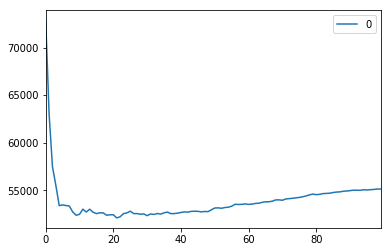

In [57]:
plot_curve = pd.DataFrame(all_error)
plot_curve.plot()

In [58]:
mini = all_error[0]
index = 0
for i in range(len(all_error)):
    if all_error[i] < mini:
        mini = all_error[i]
        index = i + 1
        
print("the smallest value RMSE is ", mini, "in index ", index)

('the smallest value RMSE is ', 52081.87976471635, 'in index ', 22)


Predict test.csv

Load Data Test

In [59]:
df_test = pd.read_csv('test.csv')
df_test = df_test[['LotArea','GarageArea']]
df_test = df_test.dropna()
print(df_test)
# predict

      LotArea  GarageArea
0       11622       730.0
1       14267       312.0
2       13830       482.0
3        9978       470.0
4        5005       506.0
5       10000       440.0
6        7980       420.0
7        8402       393.0
8       10176       506.0
9        8400       525.0
10       5858       511.0
11       1680       264.0
12       1680       320.0
13       2280       440.0
14       2280       308.0
15      12858       751.0
16      12883       868.0
17      11520       730.0
18      14122       678.0
19      14300       958.0
20      13650       756.0
21       7132       484.0
22      18494       430.0
23       3203       437.0
24      13300       400.0
25       8577       433.0
26      17433       962.0
27       8987       880.0
28       9215       676.0
29      10440       528.0
...       ...         ...
1429     7030       272.0
1430     9060       384.0
1431    12366         0.0
1432     9000         0.0
1433     8520         0.0
1434     5748       495.0
1435     384

Normalization

In [60]:
test_scaled = scaler.fit_transform(df_test)
# test_scaled
test_scaled = pd.DataFrame(test_scaled)
print(test_scaled)

             0         1
0     0.184147  0.490591
1     0.232124  0.209677
2     0.224197  0.323925
3     0.154326  0.315860
4     0.064121  0.340054
5     0.154725  0.295699
6     0.118085  0.282258
7     0.125739  0.264113
8     0.157918  0.340054
9     0.125703  0.352823
10    0.079594  0.343414
11    0.003809  0.177419
12    0.003809  0.215054
13    0.014693  0.295699
14    0.014693  0.206989
15    0.206566  0.504704
16    0.207020  0.583333
17    0.182296  0.490591
18    0.229494  0.455645
19    0.232723  0.643817
20    0.220932  0.508065
21    0.102703  0.325269
22    0.308797  0.288978
23    0.031435  0.293683
24    0.214584  0.268817
25    0.128913  0.290995
26    0.289552  0.646505
27    0.136350  0.591398
28    0.140486  0.454301
29    0.162706  0.354839
...        ...       ...
1428  0.100853  0.182796
1429  0.137675  0.258065
1430  0.197642  0.000000
1431  0.136586  0.000000
1432  0.127880  0.000000
1433  0.077598  0.332661
1434  0.043026  0.352823
1435  0.401052  0.387097


Type Markdown and LaTeX: 𝛼 pangkat 2

In [62]:
K = index
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train,y_train)

predict = model.predict(test_scaled)
predict

array([270059.63636364, 185065.22727273, 207174.31818182, ...,
       224806.81818182, 114756.81818182, 205855.18181818])

In [63]:
pd_predict = pd.DataFrame(predict)
result = pd.merge(df_test,pd_predict,right_index = True, left_index = True)
result.rename(columns = {0:"SalePrice"}, inplace = True)
print(result)

      LotArea  GarageArea      SalePrice
0       11622       730.0  270059.636364
1       14267       312.0  185065.227273
2       13830       482.0  207174.318182
3        9978       470.0  205768.181818
4        5005       506.0  187511.363636
5       10000       440.0  217162.954545
6        7980       420.0  200961.090909
7        8402       393.0  189117.500000
8       10176       506.0  203049.772727
9        8400       525.0  203232.954545
10       5858       511.0  201729.545455
11       1680       264.0  112075.000000
12       1680       320.0  104603.636364
13       2280       440.0  148409.090909
14       2280       308.0  111568.181818
15      12858       751.0  277343.727273
16      12883       868.0  356810.090909
17      11520       730.0  270059.636364
18      14122       678.0  242079.545455
19      14300       958.0  358300.272727
20      13650       756.0  271939.181818
21       7132       484.0  212483.863636
22      18494       430.0  198851.590909
23       3203   